<h2><font color="#AA00BB">Welcome to my workbook on Classification Modelling!</font></h2>

<a name="contents"></a>
## Contents
<br>1. [Project Overview](#section_1)
<br>2. [Loading the necessary Libraries](#section_2)
<br>3. [Loading the Data & Data Exploration](#section_3)
<br>4. [Data Cleaning & Data Imputation](#section_4)
<br>5. [Data Visualisation](#section_5)
<br>6. [Data Preprocessing](#section_6)
<br>7. [Building Classification Models](#section_7)
<br>8. [Models Evaluation & Model Selection](#section_8)
<br>9. [Prediction Using Decision Tree Model](#section_9)
<br>10. [Model Evaluation: Decision Tree](#section_10)
<br>11. [Summary](#section_11)
<br>12. [References](#section_12)

## **1. Project Overview**

This project focuses on developing a classification model to assist in the diagnosis of breast cancer using historical patient data. The model leverages key features such as patient age, menopause status, tumor size, presence of invasive nodes, breast affected, metastasis status, breast quadrant, and prior history of breast conditions. The primary objective is to accurately predict the likelihood of cancer occurrence based on these clinical and demographic variables.

The dataset used for this analysis was obtained from Kaggle, originally sourced from the University of Calabar Teaching Hospital cancer registry. While the data provides valuable insights into patient characteristics and cancer diagnosis trends, it is important to acknowledge that it reflects a specific hospital population. As a result, the findings and model performance may not generalize broadly to other populations or regions without additional validation on more diverse datasets.

#### **Columns Description**

| **Feature Name**     | **Description**                                                                                  |
|----------------------|--------------------------------------------------------------------------------------------------|
| **S/N**              | Unique identifier for each patient.                                                              |
| **Year**             | Year in which the diagnosis was conducted.                                                       |
| **Age**              | Age of the patient at the time of diagnosis.                                                     |
| **Menopause**        | Menopausal status at diagnosis: `0` = Postmenopausal, `1` = Premenopausal.                       |
| **Tumor Size**       | Size of the excised tumor (in centimeters).                                                      |
| **Involved Nodes**   | Number of axillary lymph nodes containing metastasis: `1` = Present, `0` = Not present.          |
| **Breast**           | Indicates spread on both sides: `1` = Cancer has spread, `0` = Has not spread.                   |
| **Metastatic**       | Indicates whether cance has spread to other organs: `1` = Yes, `0` = No.                         |
| **Breast Quadrant**  | Tumor location based on breast quadrants (e.g., Upper Outer, Lower Inner, etc.).                 |
| **History**          | Cancer history: `1` = Patient has a personal or family history, `0` = No history.                |
| **Diagnosis**        | Diagnosis outcome; used as the target variable for classification.                               |






## **2. Loading the necessary Libraries**


In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import cm 

# Statistical Analysis
import statsmodels.api as sm 
from scipy import stats 
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr


# Data Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree

# Classification Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


## **3. Loading the Data & Data Exploration**

In [2]:
Excel_file = r"C:\Users\sandr\OneDrive\Documents\Github_Testing\Data-Science-Portfolio\Code\breastcancer.csv"
data = pd.read_csv(Excel_file)
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40.0,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39.0,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45.0,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26.0,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21.0,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
210,211,2020,22.0,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19.0,1,1,0,Left,0,Lower inner,1,Benign
212,213,2020,50.0,0,4,0,Right,0,Lower outer,1,Benign
213,214,2020,NaN,0,5,NaN,NaN,1,Upper outer,0,Benign


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S/N               215 non-null    int64  
 1   Year              215 non-null    object 
 2   Age               214 non-null    float64
 3   Menopause         215 non-null    int64  
 4   Tumor Size (cm)   214 non-null    object 
 5   Inv-Nodes         214 non-null    object 
 6   Breast            213 non-null    object 
 7   Metastasis        215 non-null    object 
 8   Breast Quadrant   215 non-null    object 
 9   History           215 non-null    object 
 10  Diagnosis Result  214 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 18.6+ KB


In [4]:
print(data.isnull().sum())  # print number of misinig data in each column

S/N                 0
Year                0
Age                 1
Menopause           0
Tumor Size (cm)     1
Inv-Nodes           1
Breast              2
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    1
dtype: int64


In [5]:
# to print out rows with hash sign
mask = data.apply(lambda x: x.astype(str).str.contains('#')).any(axis=1)
rows_with_hash = data[mask]

rows_with_hash

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
30,31,2019,56.0,0,9,1,Left,1,#,0,Malignant
40,41,#,34.0,1,#,#,#,#,#,#,Malignant
47,48,2019,25.0,1,5,0,#,0,Upper outer,0,Malignant
67,68,2019,40.0,1,1,0,Left,0,Lower outer,#,Benign
143,144,2020,29.0,1,2,0,#,0,Lower inner,1,Benign
164,165,2020,38.0,1,2,0,#,0,Upper outer,1,Benign
166,167,2020,62.0,0,3,1,#,1,Upper inner,1,Malignant
178,179,2020,49.0,1,4,0,#,0,Lower outer,0,Benign


*This shows that we have some missing data in the dataset. I also noticed that in the dataset there are rows that being populated with # which clearly shows that is a data entry error.*

## **4. Data Cleaning & Data Imputation**
Data imputation is the process of replacing missing values in a dataset with substitute values(Afkanpour et al., 2024). Instead of removing rows with missing or incorrect entries, I imputed the data to retain as much information as possible and avoid reducing the dataset size. For this dataset, I will use single imputation methods. Specifically, I will replace missing values in categorical and binary columns with the mode. For numerical data, if the distribution is skewed I will use the median; if it is approximately normal, I will use the mean.

In [6]:
data.columns = data.columns.str.replace(" ", "") # to remove the white space in the columns
data.columns

Index(['S/N', 'Year', 'Age', 'Menopause', 'TumorSize(cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'BreastQuadrant', 'History', 'DiagnosisResult'],
      dtype='object')

In [7]:
columns = ['Year','Age','Menopause','TumorSize(cm)','Inv-Nodes','Metastasis','History']
for col in columns:
    data[col]= pd.to_numeric(data[col], errors= 'coerce') # changing the listed columns to float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S/N              215 non-null    int64  
 1   Year             214 non-null    float64
 2   Age              214 non-null    float64
 3   Menopause        215 non-null    int64  
 4   TumorSize(cm)    213 non-null    float64
 5   Inv-Nodes        213 non-null    float64
 6   Breast           213 non-null    object 
 7   Metastasis       214 non-null    float64
 8   BreastQuadrant   215 non-null    object 
 9   History          213 non-null    float64
 10  DiagnosisResult  214 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 18.6+ KB


In [9]:
unique_column= ['Menopause','Inv-Nodes','Breast','Metastasis','BreastQuadrant','DiagnosisResult']
for col in unique_column:
    print(f"{col}: {data[col].unique()}")

Menopause: [1 0]
Inv-Nodes: [ 0.  1. nan  3.]
Breast: ['Right' 'Left' '#' nan]
Metastasis: [ 0.  1. nan]
BreastQuadrant: ['Upper inner' 'Upper outer' 'Lower outer' 'Lower inner' '#'
 'Upper outer ']
DiagnosisResult: ['Benign' 'Malignant' nan]


In [10]:
# to ensure that Inv-Nodes and Metastasis keep only 0 or 1
data['Inv-Nodes'] = data['Inv-Nodes'].apply(lambda x: x if x in [ 0,1] else np.nan)
data['Metastasis'] = data['Metastasis'].apply(lambda x : x if x in [ 0,1] else np.nan)

# to ensure Breast column has only Left or Right
data['Breast'] = data['Breast'].apply(lambda x : x if x == 'Right' or x == 'Left' else np.nan)

# to replace '#' with NaN
data['BreastQuadrant'] = data['BreastQuadrant'].apply(lambda x : np.nan if x == '#' else x)
 
 #Remove extra space
data['BreastQuadrant'] = data['BreastQuadrant'].str.strip()


In [11]:
data_null_values = data.isnull().sum().to_frame().rename(columns = {0:'count_Value'})
print(data_null_values)

                 count_Value
S/N                        0
Year                       1
Age                        1
Menopause                  0
TumorSize(cm)              2
Inv-Nodes                  3
Breast                     8
Metastasis                 1
BreastQuadrant             2
History                    2
DiagnosisResult            1


In [12]:
empty_values = data[data.isnull().any(axis =1)] # to identify the empty cell
empty_values

,S/N,Year,Age,Menopause,TumorSize(cm),Inv-Nodes,Breast,Metastasis,BreastQuadrant,History,DiagnosisResult
30,31,2019.0,56.0,0,9.0,1.0,Left,1.0,NaN,0.0,Malignant
40,41,NaN,34.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Malignant
47,48,2019.0,25.0,1,5.0,0.0,NaN,0.0,Upper outer,0.0,Malignant
67,68,2019.0,40.0,1,1.0,0.0,Left,0.0,Lower outer,NaN,Benign
143,144,2020.0,29.0,1,2.0,0.0,NaN,0.0,Lower inner,1.0,Benign
164,165,2020.0,38.0,1,2.0,0.0,NaN,0.0,Upper outer,1.0,Benign
166,167,2020.0,62.0,0,3.0,1.0,NaN,1.0,Upper inner,1.0,Malignant
178,179,2020.0,49.0,1,4.0,0.0,NaN,0.0,Lower outer,0.0,Benign
208,209,2020.0,49.0,1,6.0,NaN,Right,1.0,Lower inner,1.0,Malignant
213,214,2020.0,NaN,0,5.0,NaN,NaN,1.0,Upper outer,0.0,Benign


In [13]:
# To find the mode of the categorical and binary columns
columns_mode = ['Inv-Nodes','Breast','BreastQuadrant','History','DiagnosisResult','Metastasis']

for col in columns_mode:
    mode_value = data[col].mode()
    if not mode_value.empty:
        print(f"Mode of '{col}': {mode_value.iloc[0]}")
    else:
        print(f"Mode of '{col}': No mode found (column may be empty)")

Mode of 'Inv-Nodes': 0.0
Mode of 'Breast': Left
Mode of 'BreastQuadrant': Upper outer
Mode of 'History': 0.0
Mode of 'DiagnosisResult': Benign
Mode of 'Metastasis': 0.0


In [14]:
# Function for filling missing values with mode

def missing_value_mode(data,columns):
    for col in columns:
        if col in data.columns:
            data[col] = data[col].replace('#', pd.NA)
            #data[col] = data[col].astype("string")
            if data[col].isnull().any():
                mode_value = data[col].mode()
                if not mode_value.empty:
                    data[col].fillna(mode_value.iloc[0], inplace = True)
    return data


In [15]:

data= missing_value_mode(data,columns_mode)
data

,S/N,Year,Age,Menopause,TumorSize(cm),Inv-Nodes,Breast,Metastasis,BreastQuadrant,History,DiagnosisResult
0,1,2019.0,40.0,1,2.0,0.0,Right,0.0,Upper inner,0.0,Benign
1,2,2019.0,39.0,1,2.0,0.0,Left,0.0,Upper outer,0.0,Benign
2,3,2019.0,45.0,0,4.0,0.0,Left,0.0,Lower outer,0.0,Benign
3,4,2019.0,26.0,1,3.0,0.0,Left,0.0,Lower inner,1.0,Benign
4,5,2019.0,21.0,1,1.0,0.0,Right,0.0,Upper outer,1.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...
210,211,2020.0,22.0,1,1.0,0.0,Left,0.0,Upper outer,1.0,Benign
211,212,2020.0,19.0,1,1.0,0.0,Left,0.0,Lower inner,1.0,Benign
212,213,2020.0,50.0,0,4.0,0.0,Right,0.0,Lower outer,1.0,Benign
213,214,2020.0,NaN,0,5.0,0.0,Left,1.0,Upper outer,0.0,Benign


In [16]:
# filling missing values with median
columns_median = ['Year','Age','TumorSize(cm)']
for col in columns_median:
    if data[col].isnull().any():
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)

In [17]:
# To ensure there is no missing values
print(data.isnull().sum())  

S/N                0
Year               0
Age                0
Menopause          0
TumorSize(cm)      0
Inv-Nodes          0
Breast             0
Metastasis         0
BreastQuadrant     0
History            0
DiagnosisResult    0
dtype: int64


In [18]:
unique_column= ['Menopause','Inv-Nodes','Breast','Metastasis','BreastQuadrant','DiagnosisResult']
for col in unique_column:
    print(f"{col}: {data[col].unique()}")

Menopause: [1 0]
Inv-Nodes: [0. 1.]
Breast: ['Right' 'Left']
Metastasis: [0. 1.]
BreastQuadrant: ['Upper inner' 'Upper outer' 'Lower outer' 'Lower inner']
DiagnosisResult: ['Benign' 'Malignant']


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S/N              215 non-null    int64  
 1   Year             215 non-null    float64
 2   Age              215 non-null    float64
 3   Menopause        215 non-null    int64  
 4   TumorSize(cm)    215 non-null    float64
 5   Inv-Nodes        215 non-null    float64
 6   Breast           215 non-null    object 
 7   Metastasis       215 non-null    float64
 8   BreastQuadrant   215 non-null    object 
 9   History          215 non-null    float64
 10  DiagnosisResult  215 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 18.6+ KB


In [20]:

# droping the "S/N" column because it won't be needed for the analysis and model building
data=data.drop('S/N',axis=1)
df = data.copy()
df

,Year,Age,Menopause,TumorSize(cm),Inv-Nodes,Breast,Metastasis,BreastQuadrant,History,DiagnosisResult
0,2019.0,40.0,1,2.0,0.0,Right,0.0,Upper inner,0.0,Benign
1,2019.0,39.0,1,2.0,0.0,Left,0.0,Upper outer,0.0,Benign
2,2019.0,45.0,0,4.0,0.0,Left,0.0,Lower outer,0.0,Benign
3,2019.0,26.0,1,3.0,0.0,Left,0.0,Lower inner,1.0,Benign
4,2019.0,21.0,1,1.0,0.0,Right,0.0,Upper outer,1.0,Benign
...,...,...,...,...,...,...,...,...,...,...
210,2020.0,22.0,1,1.0,0.0,Left,0.0,Upper outer,1.0,Benign
211,2020.0,19.0,1,1.0,0.0,Left,0.0,Lower inner,1.0,Benign
212,2020.0,50.0,0,4.0,0.0,Right,0.0,Lower outer,1.0,Benign
213,2020.0,40.0,0,5.0,0.0,Left,1.0,Upper outer,0.0,Benign


In [21]:
print(df['Metastasis'].unique())

[0. 1.]


In [22]:
df['Menopause'] = df['Menopause'].apply(lambda x: "Yes" if x == 1 else "No")
df['Metastasis'] = df['Metastasis'].apply(lambda x: "Yes" if x == 1 else "No")
df['Inv-Nodes'] = df['Inv-Nodes'].apply(lambda x: "Yes" if x == 1 else "No")
df['History'] = df['History'].apply(lambda x: "Yes" if x == 1 else "No")
df

,Year,Age,Menopause,TumorSize(cm),Inv-Nodes,Breast,Metastasis,BreastQuadrant,History,DiagnosisResult
0,2019.0,40.0,Yes,2.0,No,Right,No,Upper inner,No,Benign
1,2019.0,39.0,Yes,2.0,No,Left,No,Upper outer,No,Benign
2,2019.0,45.0,No,4.0,No,Left,No,Lower outer,No,Benign
3,2019.0,26.0,Yes,3.0,No,Left,No,Lower inner,Yes,Benign
4,2019.0,21.0,Yes,1.0,No,Right,No,Upper outer,Yes,Benign
...,...,...,...,...,...,...,...,...,...,...
210,2020.0,22.0,Yes,1.0,No,Left,No,Upper outer,Yes,Benign
211,2020.0,19.0,Yes,1.0,No,Left,No,Lower inner,Yes,Benign
212,2020.0,50.0,No,4.0,No,Right,No,Lower outer,Yes,Benign
213,2020.0,40.0,No,5.0,No,Left,Yes,Upper outer,No,Benign


## **5. Data Visualisation**


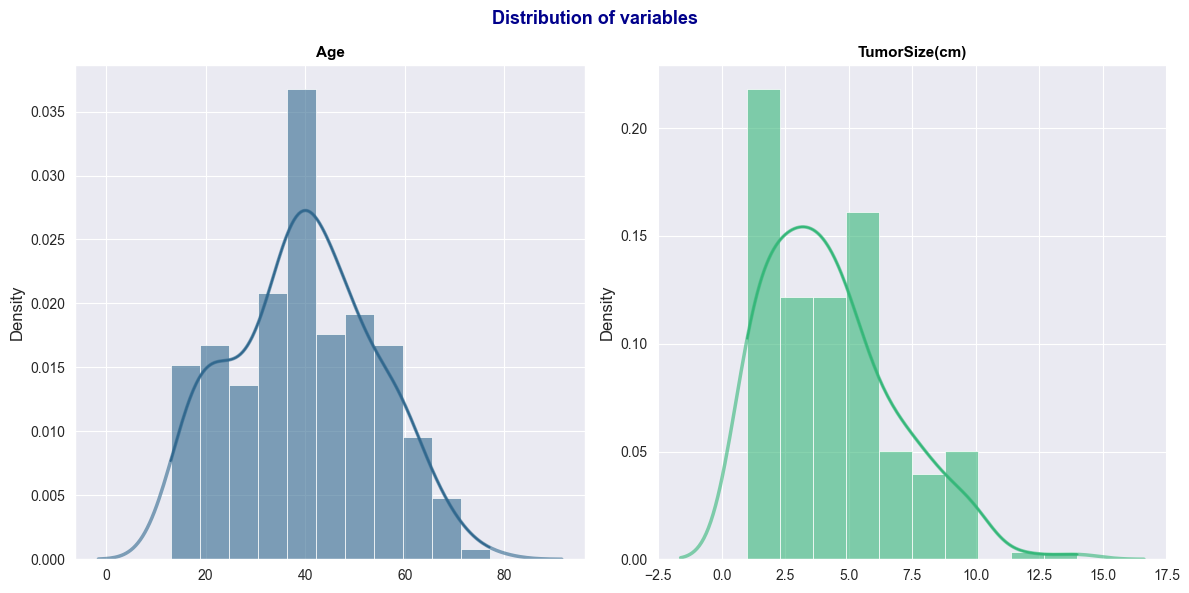

In [23]:
# Enable inline plotting 
%matplotlib inline

# Define the columns to plot and colors
columns_to_plot = ['Age', 'TumorSize(cm)']
colors = sns.color_palette(palette='viridis', n_colors=len(columns_to_plot))

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax = ax.flat

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.kdeplot(df[col], alpha=0.6, linewidth=2.5, color=colors[i], ax=ax[i])
    sns.histplot(df[col], stat='density', kde=True, alpha=0.6, color=colors[i], ax=ax[i])
    ax[i].set_xlabel("")
    ax[i].set_title(col, fontsize=11, fontweight="bold", color="black")

# Set the main title
fig.suptitle("Distribution of variables", fontsize=13, fontweight="bold", color="darkblue")

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

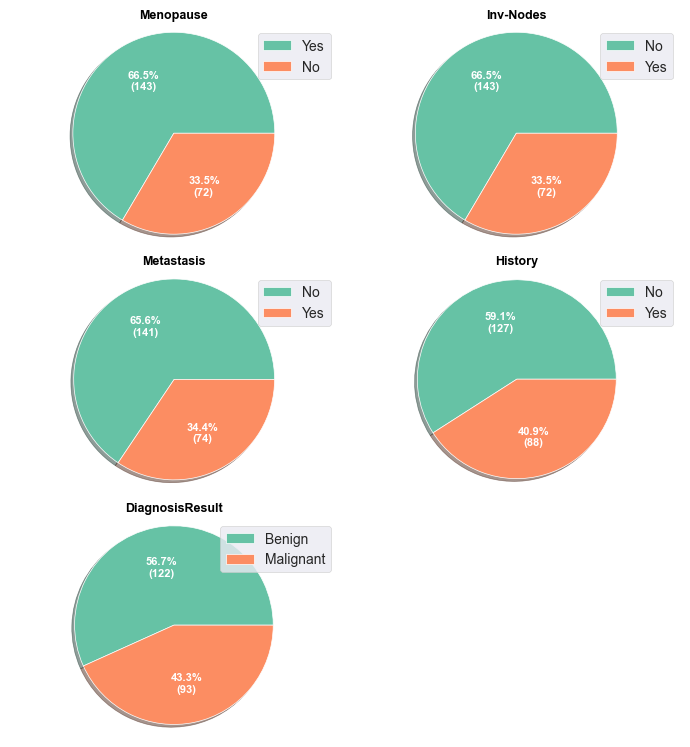

In [24]:
columns_to_plot = [ 'Menopause', 'Inv-Nodes','Metastasis','History','DiagnosisResult']
def make_pieplot(values):
    def pie_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return pie_autopct

fig,ax = plt.subplots(nrows = 4, ncols = 2, figsize = (7,10))
ax = ax.flat

#to loop through each column to create a pie chart
for i,col in enumerate(columns_to_plot):
    class_ =df[col].value_counts().to_frame()
    labels = class_.index
    values = class_.iloc[:,0].to_list()
    color = cm.get_cmap('Set2')(range(len(values)))
    ax[i].pie(x = values, labels = labels, autopct=make_pieplot(values), shadow = True,colors = color, textprops = {'color':'white', 'fontsize':8, 'fontweight':'bold'})
    ax[i].legend(labels)
    ax[i].set_title(col, fontsize = 9, fontweight = "bold", color = "black")
    ax[i].axis('equal')

for j in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
plt.show()


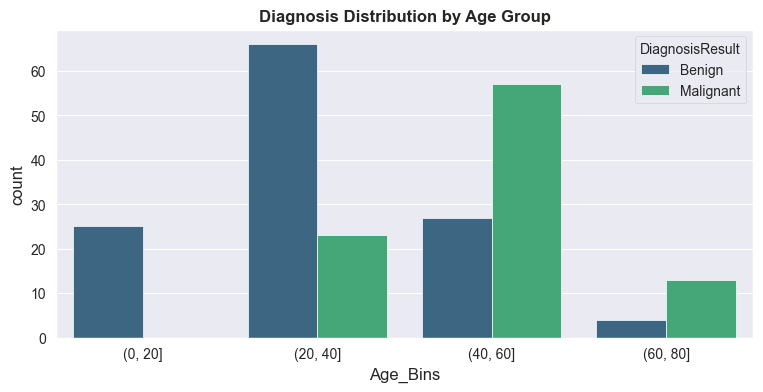

In [25]:
df['Age_Bins'] = pd.cut(df['Age'], [0, 20, 40, 60, 80])

# Count occurrences of each combination of Bins_Age and DiagnosisResult
df_diagnosis = df.groupby(['Age_Bins', 'DiagnosisResult']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(9, 4))
sns.barplot(data=df_diagnosis, x='Age_Bins', y='count', hue='DiagnosisResult',palette= 'viridis')
plt.title("Diagnosis Distribution by Age Group", fontsize=12, fontweight = 'bold')
plt.show()

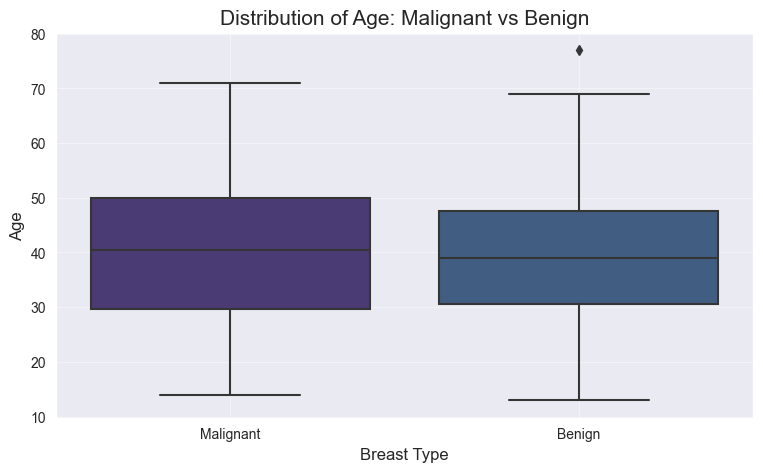

,count,mean,std,min,25%,50%,75%,max
Breast,,,,,,,,
Left,115.0,39.095652,13.905050,13.0,30.50,39.0,47.5,77.0
Right,100.0,40.310000,14.467445,14.0,29.75,40.5,50.0,71.0


Mann-Whitney U Test Statistic: 6130.0
P-Value: 0.4041
Failed to reject null hypothesis.There is Lack of evidence to conclude that there is a statistically significant difference in age between Malignant and Benign groups.
This means there is no statistically significant difference in age between patients diagnosed with Malignant vs Benign tumors — based on your current dataset.


In [26]:
plt.figure(figsize=(9,5))
colors = sns.color_palette(palette = 'viridis')
sns.boxplot(data=df, x=df['Breast'], y=df['Age'], palette=colors)
plt.title('Distribution of Age: Malignant vs Benign', fontsize=15)
plt.xticks([0,1], ['Malignant','Benign'])
plt.xlabel('Breast Type')
plt.ylabel('Age')
plt.grid(alpha=0.4)
plt.show()

# display summary statistic
data_out_put = df.groupby('Breast')
Malignant= data_out_put.get_group('Right')
Benign = data_out_put.get_group('Left')
display(data_out_put['Age'].describe())

# perform Mann-Whitney U test to compare the age between Malignant and Benign groups
res = mannwhitneyu(Malignant['Age'],Benign['Age'])
test_stat = round(res.statistic, 4)
pvalue = round(res.pvalue, 4)

print(f"Mann-Whitney U Test Statistic: {test_stat}")
print(f"P-Value: {pvalue}")

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant difference in age between Malignant and Benign groups.')
else:
    print('Failed to reject null hypothesis.There is Lack of evidence to conclude that there is a statistically significant difference in age between Malignant and Benign groups.')
    print("This means there is no statistically significant difference in age between patients diagnosed with Malignant vs Benign tumors — based on your current dataset.")


## **6. Data Preprocessing**
- **Encode Categorical Variables**: If the features are categorical, use LabelEncoder for Diaglosis Result column and OneHotEncoder for (Year, Breast, BreastQuadrant) columns from scikit-learn.preprocessing to encode them into numerical values. The Year column is one hot encoder because each year represents a distinct, unordered group and no ordinal relationship.
- **Feature Scaling:** Scale the features (Age, TumorSize(cm)) using StandardScaler, MinMaxScaler or PowerTransformer.
- **Split the Dataset:** Use train_test_split from scikit-learn.model_selection to split the data into training and testing sets.

In [27]:
# Encode target once
label_mapping = {'Benign': 0, 'Malignant': 1}
data['DiagnosisResult'] = data['DiagnosisResult'].map(label_mapping)

# grouping columns into X and y
X = data.drop('DiagnosisResult',axis = 1) 
y = data['DiagnosisResult']


# splitting my data into train and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)

# Step 3: Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

categorical_cols = ['Year', 'Breast', 'BreastQuadrant']
numerical_cols = ['Age', 'TumorSize(cm)']


preprocessor = ColumnTransformer( transformers=[('scaler', PowerTransformer(), numerical_cols),
                                  ('ohe', OneHotEncoder(sparse = False,handle_unknown='ignore'), categorical_cols)], 
                                 remainder = 'passthrough', verbose = False)


X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)


print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 129
Validation size: 64
Test size: 22


<a name="section_2"></a>

## **7. Building Calssification Models**

- ### **Decision Tree Classifiers**

Decision trees, is a non-parametric technique that segments the feature space into regions defined by decision rules based on the features (Vallée et al., 2023). It a popular machine learning algorithm used for classification tasks, which relies on the proximity to the nearest observations, decision trees make decisions by sequentially asking questions to drill down to the predictions, offering a clear, interpretable model structure without assuming any form for the underlying data distribution (Prabhakar et al., 2025). It is a flowchart like structure where each internal node represents a decision based on an attribute, where each branch represents the outcome of the decisionn and each leaf node represents a class label or a continuous value.

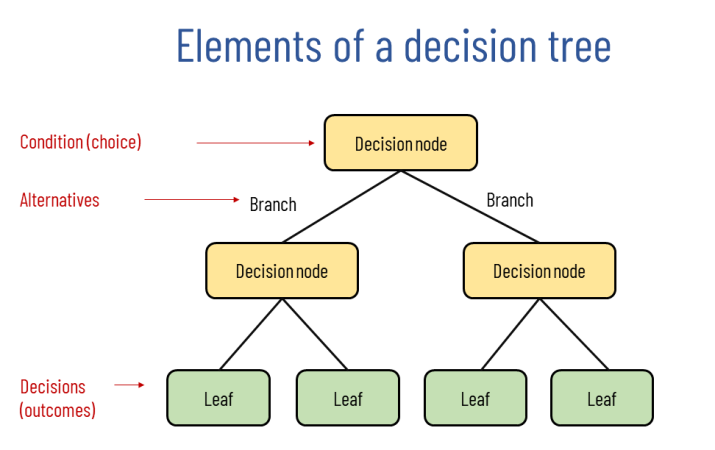

---

- ### **Logistic Regression**
Logistic Regression is a supervised machine learning algorithm used for classification tasks (Shetty et al., 2022). Unlike Linear regression which predicts continous values, logistic regression predicts the probability that an input belongs to a specific class (Bemporad, 2022). It is commonly used for binary classification where the output can be of toe possible categories such as Yes/No, True/False or 0/1. It uses sigmoid function to convert inputs into a probality value between 0 and 1. 

---

- ### **K-Nearest Neighbor Classifier**
The **k-Nearest Neighbors (KNN)** algorithm is a non-parametric method used for classification and regression that predicts the label of a data point by looking at the 'k' closest labelled data points, taking a majority vote for classification or averaging for regression (Halder et al., 2024). It is considered non-parametric because it makes no assumptions about the underlying data distribution, allowing it to flexibly adapt to the actual structure of the data (Tajmouati et al., 2024).

---

- ### **Random Forest Classifier**
Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes of the individual trees for classification tasks, or mean prediction for regression tasks (Salman et al., 2024). It's a strong model with capabilities for both classification and regression problems.

**Why Use Random Forest?**

- Accuracy: Random Forests tend to give a more accurate model compared to individual decision trees due to the ensemble effect.

- Overfitting: It reduces the risk of overfitting by averaging multiple trees.

- Versatility: It can be used for both regression and classification tasks.

---

### **Model Evaluation Metrics**

- **Evaluate the Model:** Use accuracy, precision, recall, and F1 score to evaluate the model's performance. 
                        classification_report from scikit-learn.metrics can provide most of these metrics.

- **Accuracy:**  The proportion of correct predictions out of all predictions.

- **Precision:** The proportion pf positive predictions that were correct.

- **Recall:**    The proportion of actual positives correctly identified.

- **F1 Score:**  The harmonic mean of precision and recall.

Using the Validation set for model evaluation and model selection



In [28]:

#function to evaluate a model
def model_evaluation(X, y_true, clf, model_name=''):
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0)
    
    result = pd.DataFrame(
        {'Model': [model_name], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]}
    )
    return result

#function to train a model with GridSearchCV
def train_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_



# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# KNN
knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}


# Apply preprocessing to training and validation sets
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)

# Train all models
models = {
    'Decision Tree': (dt_model, dt_params),
    'Logistic Regression': (log_model, log_params),
    'Random Forest': (rf_model, rf_params),
    'KNN': (knn_model, knn_params)
}

summary_df = pd.DataFrame()
best_models = {}
for name, (model, params) in models.items():
    best_model, best_params, best_score = train_model(model, params, X_train_prep, y_train)
    print(f"{name} Best Parameters: {best_params}")
    print(f"{name} Best Cross-Validated Accuracy: {round(best_score, 4)}")
    
    best_models[name] = best_model
    result = model_evaluation(X_val_prep, y_val, best_model, model_name=name)
    summary_df = pd.concat([summary_df, result], ignore_index=True)


# Display performance comparison
summary_df.sort_values(by='F1 Score', ascending=False, inplace=True)
summary_df.reset_index(drop=True, inplace=True)
summary_df

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Best Cross-Validated Accuracy: 0.8991
Logistic Regression Best Parameters: {'C': 10, 'solver': 'liblinear'}
Logistic Regression Best Cross-Validated Accuracy: 0.892
Random Forest Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Cross-Validated Accuracy: 0.9151
KNN Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
KNN Best Cross-Validated Accuracy: 0.884


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.890625,0.898661,0.890625,0.888815
1,Logistic Regression,0.875000,0.897727,0.875000,0.870833
2,Random Forest,0.875000,0.897727,0.875000,0.870833
3,KNN,0.859375,0.874516,0.859375,0.855561


## **8. Models Evaluation & Model Selection**

We compared the performance of four classification models:

- **Decision Tree**
- **Logistic Regression**
- **Random Forest**
- **K-Nearest Neighbors (KNN)**

Each model was evaluated using key metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

Based on the results:

- **Decision Tree** achieved the highest overall performance, with an **accuracy of 89.1%**, and strong precision and recall scores.
- **Random Forest** and **Logistic Regression** followed closely behind, both achieving **87.5%** accuracy.
- **KNN** had slightly lower performance, with an **accuracy of 85.9%**.

 **Conclusion**:  
The **Decision Tree** model stands out as the optimal choice for predicting whether a patient has cancer based on the dataset features. Its simplicity and interpretability make it especially valuable in clinical or decision-support applications.



## **9. Prediction using Decision Tree Model**

In [29]:
# Save best decision tree model separately for later use
best_dt_model = best_models['Decision Tree']
# Make predictions on the test and train set
y_train_pred = best_dt_model.predict(X_train_prep)
y_test_pred = best_dt_model.predict(X_test_prep)


# Generate and print classification report
print("Classification Report for Decision Tree on Train Set:\n")
print(classification_report(y_train, y_train_pred, target_names=['Benign', 'Malignant']))
print('')
print('--------------------------------------------------------------')
print("Classification Report for Decision Tree on Test Set:\n")
print(classification_report(y_test, y_test_pred, target_names=['Benign', 'Malignant']))



Classification Report for Decision Tree on Train Set:

              precision    recall  f1-score   support

      Benign       0.91      0.97      0.94        73
   Malignant       0.96      0.88      0.92        56

    accuracy                           0.93       129
   macro avg       0.94      0.92      0.93       129
weighted avg       0.93      0.93      0.93       129


--------------------------------------------------------------
Classification Report for Decision Tree on Test Set:

              precision    recall  f1-score   support

      Benign       0.86      0.92      0.89        13
   Malignant       0.88      0.78      0.82         9

    accuracy                           0.86        22
   macro avg       0.87      0.85      0.86        22
weighted avg       0.86      0.86      0.86        22



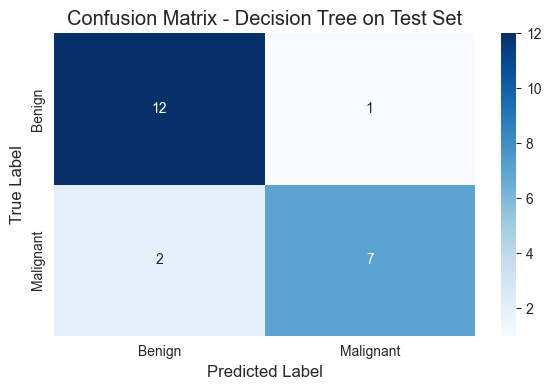

In [30]:
# Generate predictions
y_test_pred = best_dt_model.predict(X_test_prep)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = ['Benign', 'Malignant']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree on Test Set")
plt.tight_layout()
plt.show()

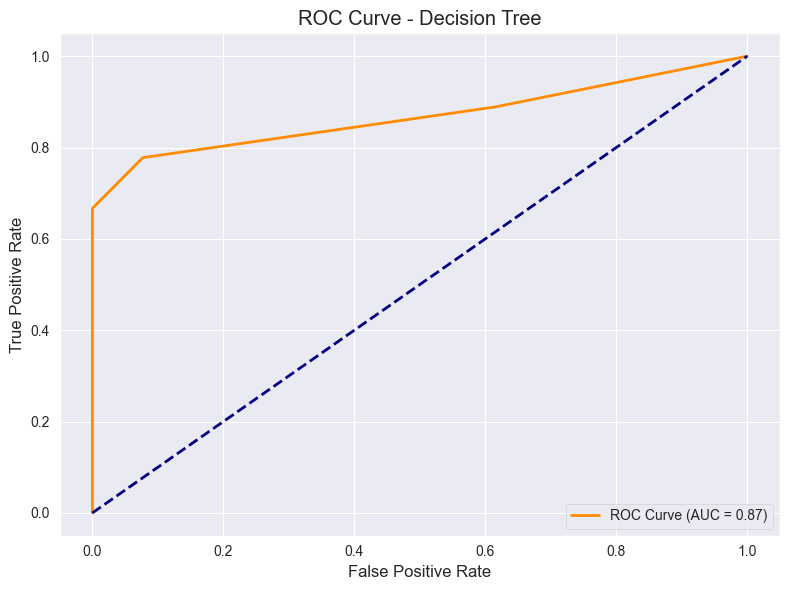

In [32]:
# Predict probabilities on the test set
y_proba = best_dt_model.predict_proba(X_test_prep)[:, 1]  # Probability of class 1 (Malignant)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## **10. Model Evaluation: Decision Tree Classifier**

### **Training Set Performance**
- **Precision**:  
  - **Benign (0.91)** → Out of all predictions labeled as *Benign*, 91% were correct. This means the model is fairly reliable in minimizing false positives for benign cases.  
  - **Malignant (0.96)** → Out of all predictions labeled as *Malignant*, 96% were correct. This shows the model is highly confident when classifying malignancies, with very few false positives.

- **Recall**:  
  - **Benign (0.97)** → The model successfully identified 97% of all true benign cases, showing excellent sensitivity in capturing benign diagnoses.  
  - **Malignant (0.88)** → The model captured 88% of all true malignant cases, which is still strong but indicates some malignant cases were missed.

- **F1-Score**:  
  - **Benign (0.94)** and **Malignant (0.92)** → Both are high, reflecting a good balance between precision and recall.  
  - The F1 scores indicate the model performs consistently across both classes.

- **Accuracy**:  
  - **93%** overall accuracy on the training data.  
  - This suggests the model fits the training set very well without signs of severe underfitting.

---

### **Test Set Performance**
- **Precision**:  
  - **Benign (0.86)** → Out of all predictions labeled as *Benign*, 86% were truly benign. This shows a slight drop compared to training, meaning the model occasionally misclassifies malignant cases as benign.  
  - **Malignant (0.88)** → Out of all predictions labeled as *Malignant*, 88% were correct. The precision for malignant cases remains fairly strong, meaning few benign cases are wrongly classified as malignant.

- **Recall**:  
  - **Benign (0.92)** → The model identified 92% of benign cases correctly, showing excellent sensitivity to benign cases.  
  - **Malignant (0.78)** → The recall for malignant cases is noticeably lower. This means the model only correctly identified 78% of malignant cases, missing around one-third of them.

- **F1-Score**:  
  - **Benign (0.89)** → Balanced performance between precision and recall.  
  - **Malignant (0.82)** → Weaker compared to benign, due to lower recall. Indicates the model struggles more in consistently identifying malignant cases.

- **Accuracy**:  
  - **86% overall accuracy** on the test data.  
  - While lower than training accuracy (93%), it’s still respectable. The drop suggests some generalization error, but not excessive overfitting.

---

### **Confusion Matrix on Test Set**

The confusion matrix helps visualize classification errors:

- **True Positives (Malignant correctly classified)**: 7  
- **True Negatives (Benign correctly classified)**: 12  
- **False Positives (Benign misclassified as Malignant)**: 1  
- **False Negatives (Malignant misclassified as Benign)**: 2  

**Interpretation**:  
- The model performs very well at identifying *Benign* cases (92% recall), but struggles with *Malignant* cases, missing 2 out of 9.  
- In a medical context, **false negatives (missed malignant cases)** are more critical, as they could delay treatment. Thus, improving recall for malignant cases should be a focus.

---


## **11. Summary**
- The Decision Tree classifier shows a strong performance on the training set and reasonable generalization to the test set.  
- However, the reduced recall for malignant cases highlights a potential clinical limitation: the risk of under-diagnosing cancer.  

**Overall, the Decision Tree achieves 82% test accuracy with good precision but requires tuning to better capture malignant cases.**

## **12. Reference**

- Afkanpour, M., Hosseinzadeh, E. and Tabesh, H., 2024. Identify the most appropriate imputation method for handling missing values in clinical structured datasets: a systematic review. BMC Medical Research Methodology, 24(1), p.188.

- Bemporad, A., 2022. A piecewise linear regression and classification algorithm with application to learning and model predictive control of hybrid systems. IEEE Transactions on Automatic Control, 68(6), pp.3194-3209.

- Halder, R.K., Uddin, M.N., Uddin, M.A., Aryal, S. and Khraisat, A., 2024. Enhancing K-nearest neighbor algorithm: a comprehensive review and performance analysis of modifications. Journal of Big Data, 11(1), p.113.

- Prabhakar, M., Lin, B.T.W. and Kusari, A., 2025. A Non-Parametric Unsupervised Approach for Robust Lane-Change Estimation From Highway-Based Trajectory Data. IEEE Transactions on Intelligent Transportation Systems.

- Salman, H.A., Kalakech, A. and Steiti, A., 2024. Random forest algorithm overview. Babylonian Journal of Machine Learning, 2024, pp.69-79.

- Shetty, S.H., Shetty, S., Singh, C. and Rao, A., 2022. Supervised machine learning: algorithms and applications. Fundamentals and methods of machine and deep learning: algorithms, tools and applications, pp.1-16.

- Tajmouati, S., Wahbi, B.E., Bedoui, A., Abarda, A. and Dakkon, M., 2024. Applying k‐nearest neighbors to time series forecasting: Two new approaches. Journal of Forecasting, 43(5), pp.1559-1574.

- Vallée, R., Vallée, J.N., Guillevin, C., Lallouette, A., Thomas, C., Rittano, G., Wager, M., Guillevin, R. and Vallée, A., 2023. Machine learning decision tree models for multiclass classification of common malignant brain tumors using perfusion and spectroscopy MRI data. Frontiers in oncology, 13, p.1089998.